In [3]:
#Data Cleaning and inspection
#Data inspection
import pandas as pd
df = pd.read_csv(r"C:\Users\iswar\OneDrive\文档\ML Materials\Projects\Simplilearn projects\Cohort analysis\1717427915_rolling_stones_spotify\rolling_stones_spotify.csv")
print(df.describe())
df.shape

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

(1610, 18)

In [6]:
#Data Cleaning -- Null values
df.isnull().sum()
only_null = df[df.isnull().any(axis=1)]
print(only_null)

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


In [20]:
#Data Cleaning -- Duplicate values
#Row level data
only_duplicates = df[df.duplicated()]
print(only_duplicates)

#Column level data
print(df.iloc[1,2])
print(df.columns)
for i in df.columns:
    while i > 18:
        if i == i+1:
            
            

    
        
        

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []
Licked Live In NYC
Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')


      norm_loudness  norm_tempo  norm_popularity  norm_duration_ms
0          0.491365    0.420994           0.4125          0.028766
1          0.838035    0.500239           0.4250          0.241629
2          0.832350    0.492057           0.4250          0.252023
3          0.806745    0.509303           0.4000          0.296483
4          0.825425    0.494808           0.4000          0.295677
...             ...         ...              ...               ...
1605       0.649483    0.770502           0.4875          0.138500
1606       0.640378    0.444637           0.4500          0.233400
1607       0.703044    0.297504           0.3750          0.161396
1608       0.634393    0.330483           0.3375          0.104780
1609       0.685432    0.463838           0.4375          0.175036

[1610 rows x 4 columns]


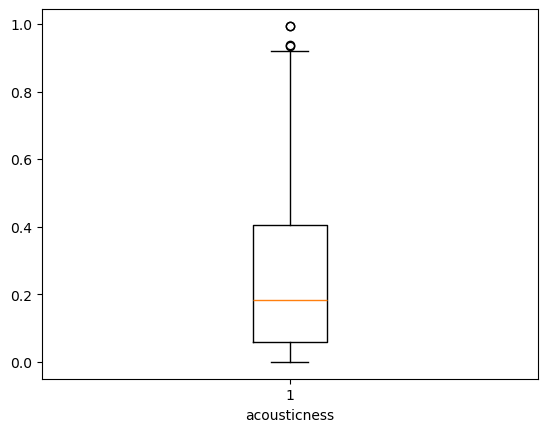

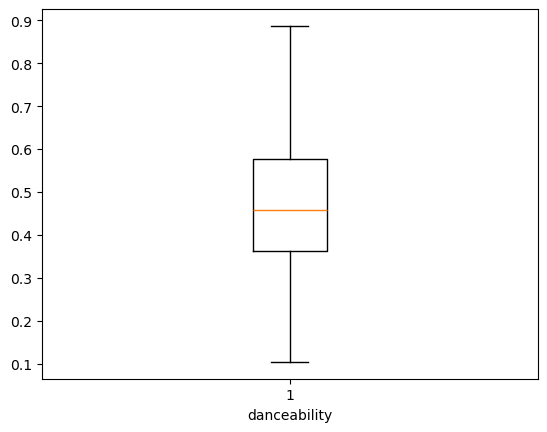

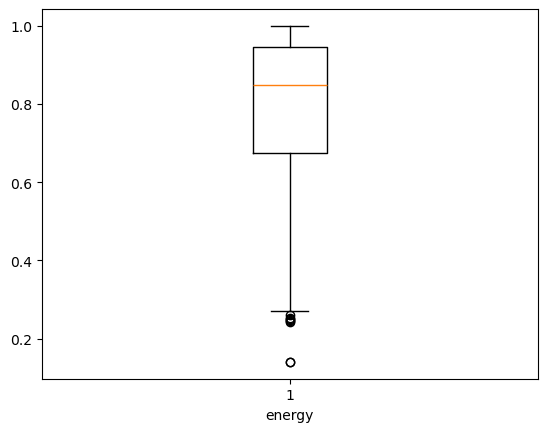

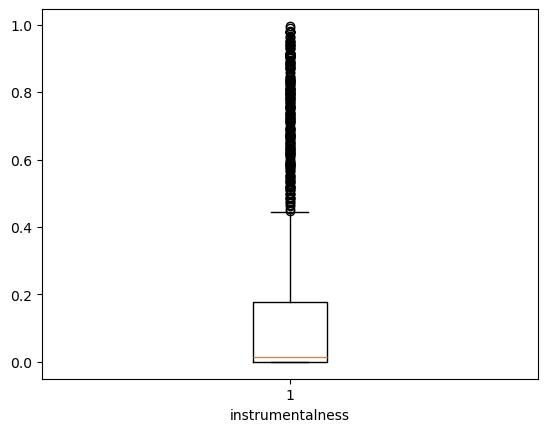

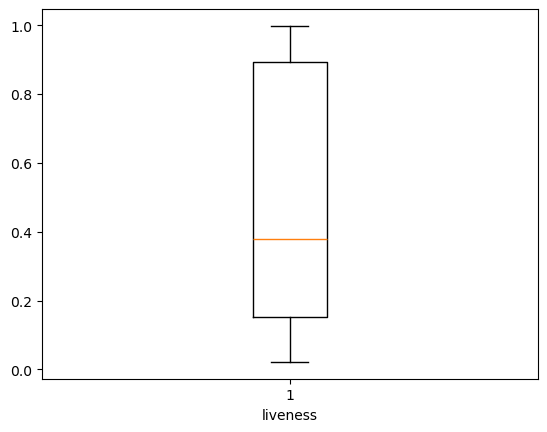

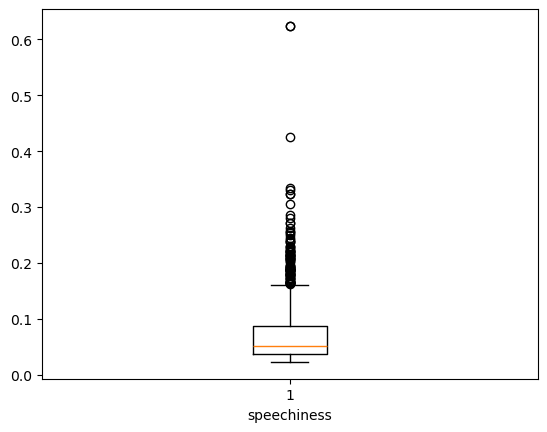

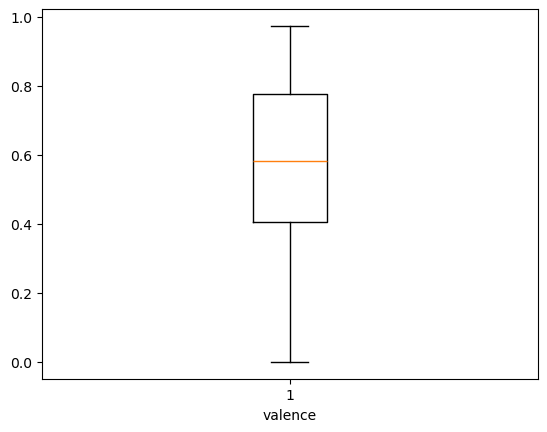

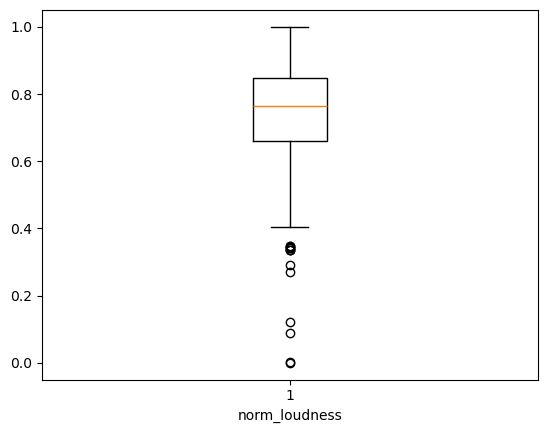

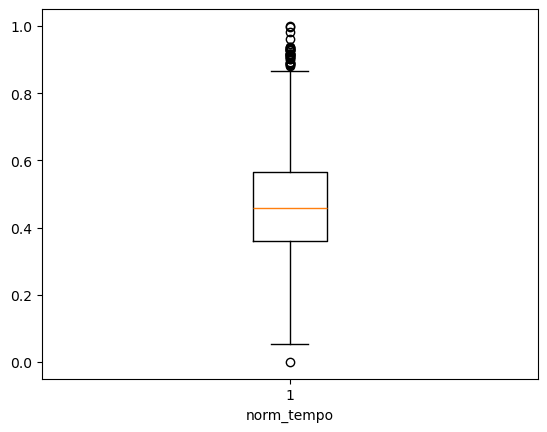

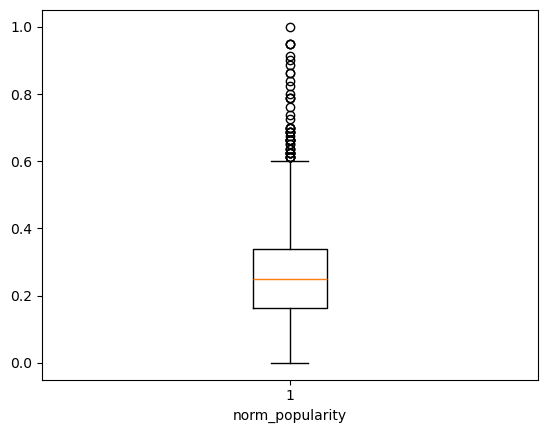

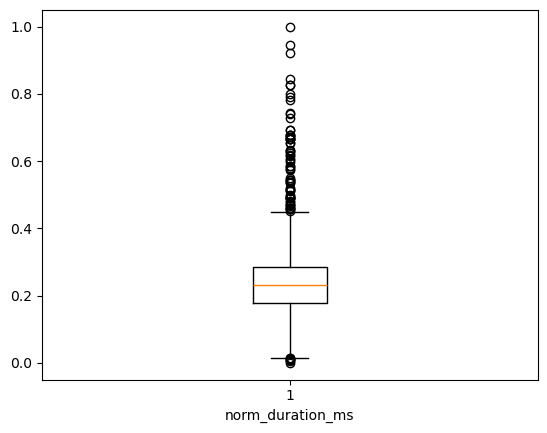

In [45]:
#outlier detection:
#Normalizing the data since only3 columns are in different scale rest all in the same value range of 0 to 1. 
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
columns_to_normalize = df[["loudness","tempo","popularity","duration_ms"]]
normalized_df = Scaler.fit_transform(columns_to_normalize)
new_df = pd.DataFrame(normalized_df)
new_df.columns = ["norm_loudness","norm_tempo","norm_popularity","norm_duration_ms"]
print(new_df)
merged_df = pd.concat([df, new_df], axis =1)
merged_df
String_columns = df[['Unnamed: 0','name','album', 'release_date','track_number','id', 'uri',"loudness","tempo","popularity","duration_ms" ]]
for i in merged_df:
    if i not in String_columns:
        plt.boxplot(merged_df[i])
        plt.xlabel(i)
        plt.show()
#After viewing the boxplot it is clear that all the values are in the range of 0 to 1. And No outlier present.

In [ ]:
#Data Refining 

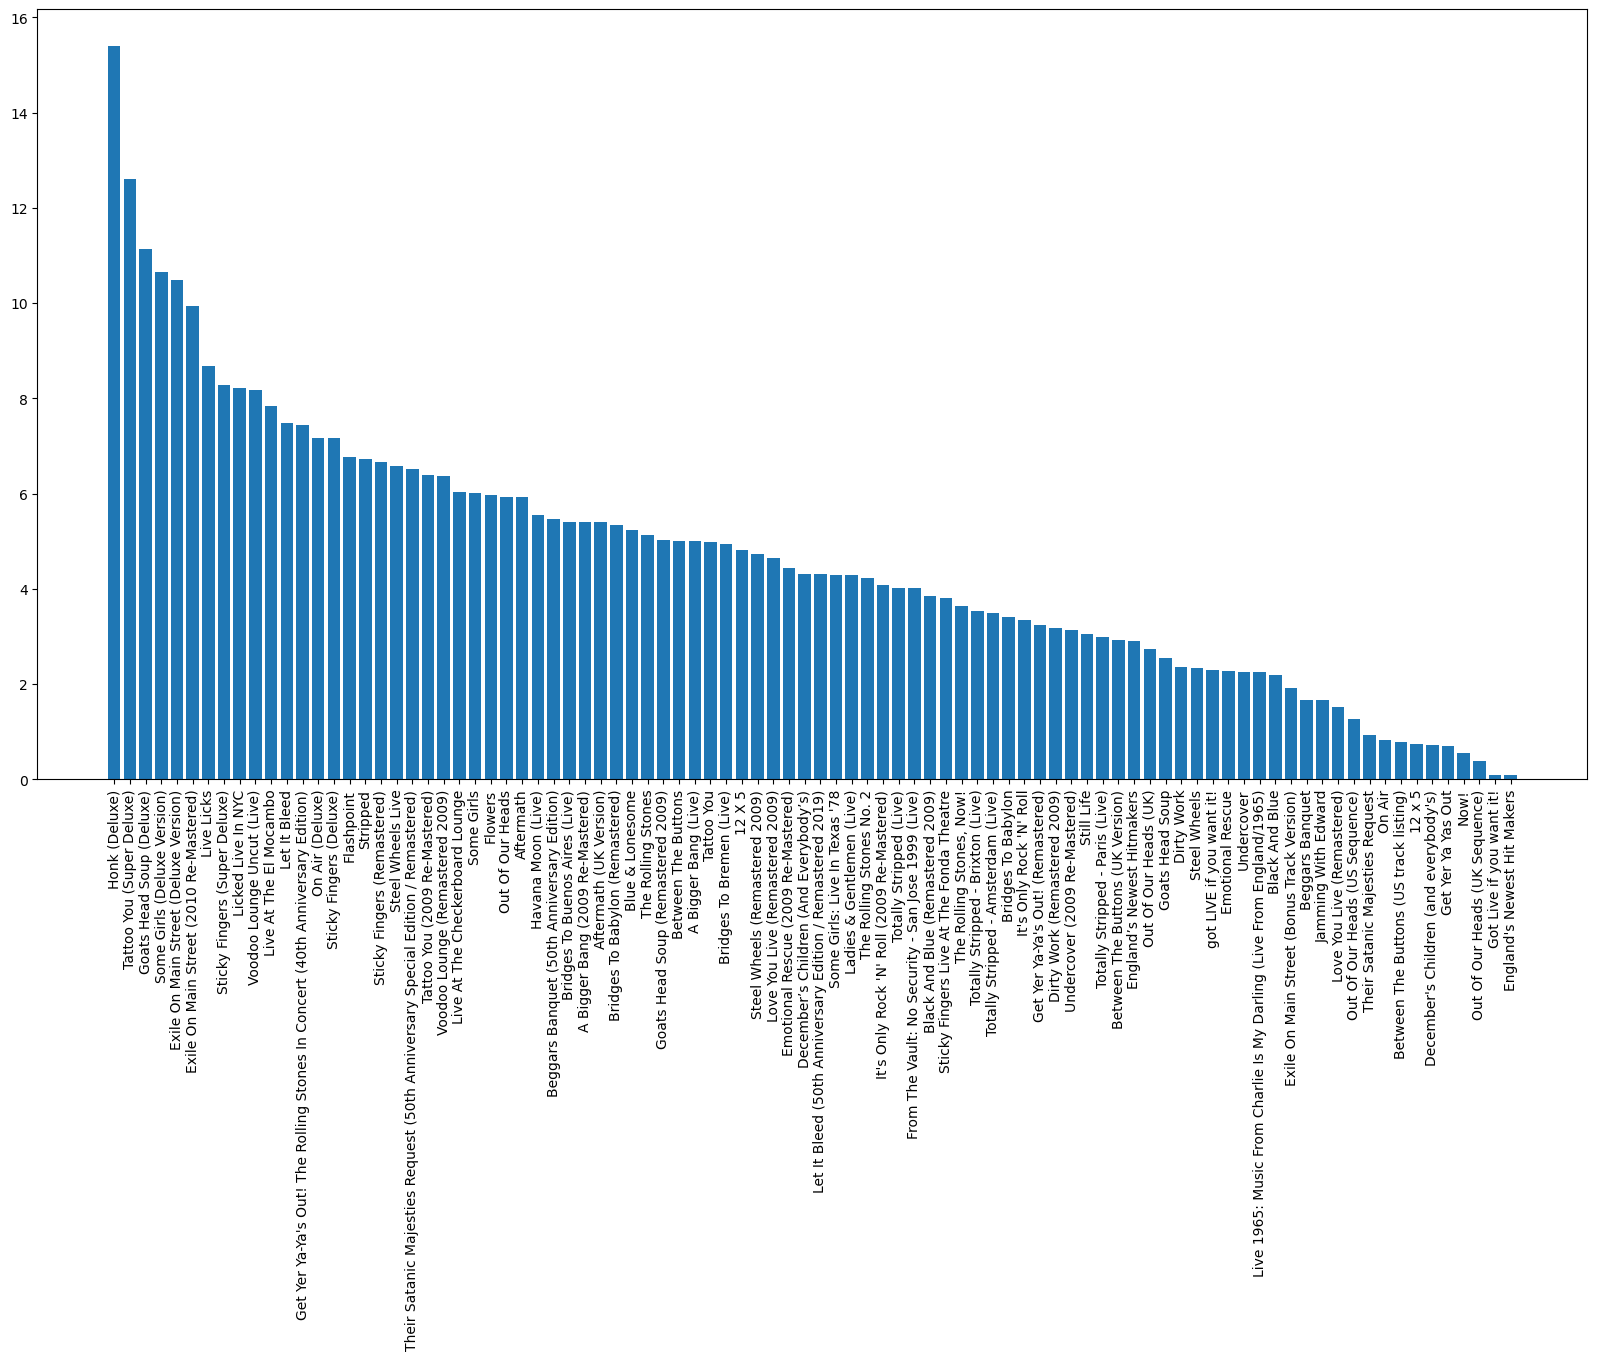

In [68]:
#Exploratory data analysis

#  #Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each albummer

album_data = merged_df.groupby('album')['norm_popularity'].agg(total_popularity='sum').reset_index()
sorted_plot = album_data.sort_values(by='total_popularity', ascending  =False)
plt.figure(figsize=(20,10))
plt.bar(x=sorted_plot['album'],height=sorted_plot['total_popularity'])
plt.xticks(rotation = 90)
plt.show()


                  danceability    energy  instrumentalness  liveness  \
danceability          1.000000 -0.300536         -0.031812 -0.516387   
energy               -0.300536  1.000000          0.120261  0.511188   
instrumentalness     -0.031812  0.120261          1.000000  0.008873   
liveness             -0.516387  0.511188          0.008873  1.000000   
norm_loudness        -0.249406  0.698039          0.012524  0.327036   
speechiness          -0.322684  0.417214          0.009586  0.400018   
norm_tempo           -0.324398  0.201885          0.010961  0.108855   
valence               0.546210  0.046217          0.103480 -0.347451   
norm_popularity       0.141205 -0.057272         -0.010612 -0.205845   
norm_duration_ms     -0.220045  0.148876         -0.137599  0.304735   

                  norm_loudness  speechiness  norm_tempo   valence  \
danceability          -0.249406    -0.322684   -0.324398  0.546210   
energy                 0.698039     0.417214    0.201885  0.046217 

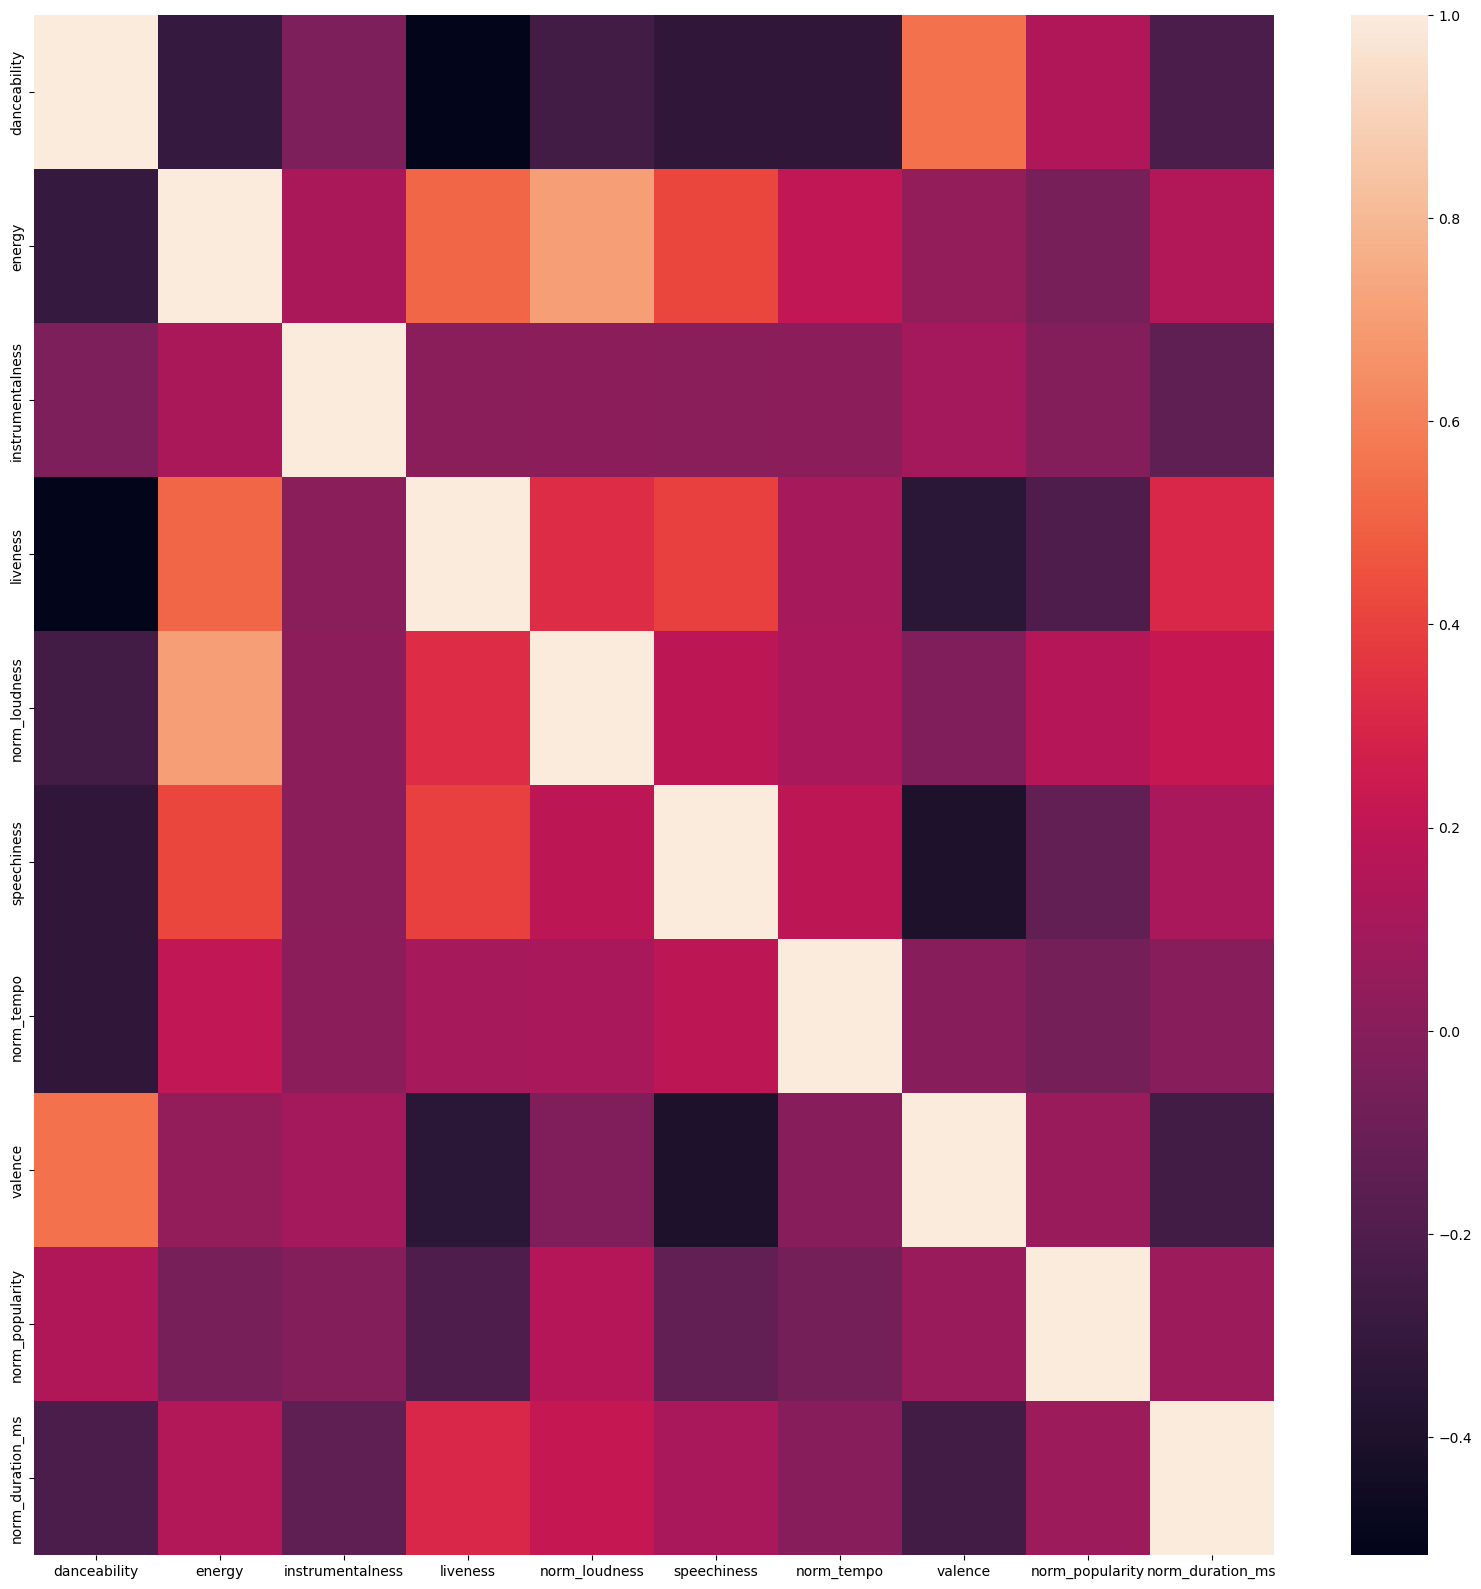

In [74]:
#Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns 

#using heatmap to find out the pattern of various features of songs. to create a heatmap, correlation matrix needs to be created.

corr_matrix_df = merged_df[["danceability", "energy", "instrumentalness", "liveness", "norm_loudness", "speechiness", "norm_tempo", "valence", "norm_popularity", "norm_duration_ms"]]
corr_matrix = corr_matrix_df.corr()      
print(corr_matrix)
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
# from the above heatmap i can find correlation good correlation between energy vs loudness
# danceability vs valence
# energy vs liveness
# speechness vs enerygy
# speechness vs liveness
# loudness vs energy
# valence vs danceability


<Figure size 2000x2000 with 0 Axes>

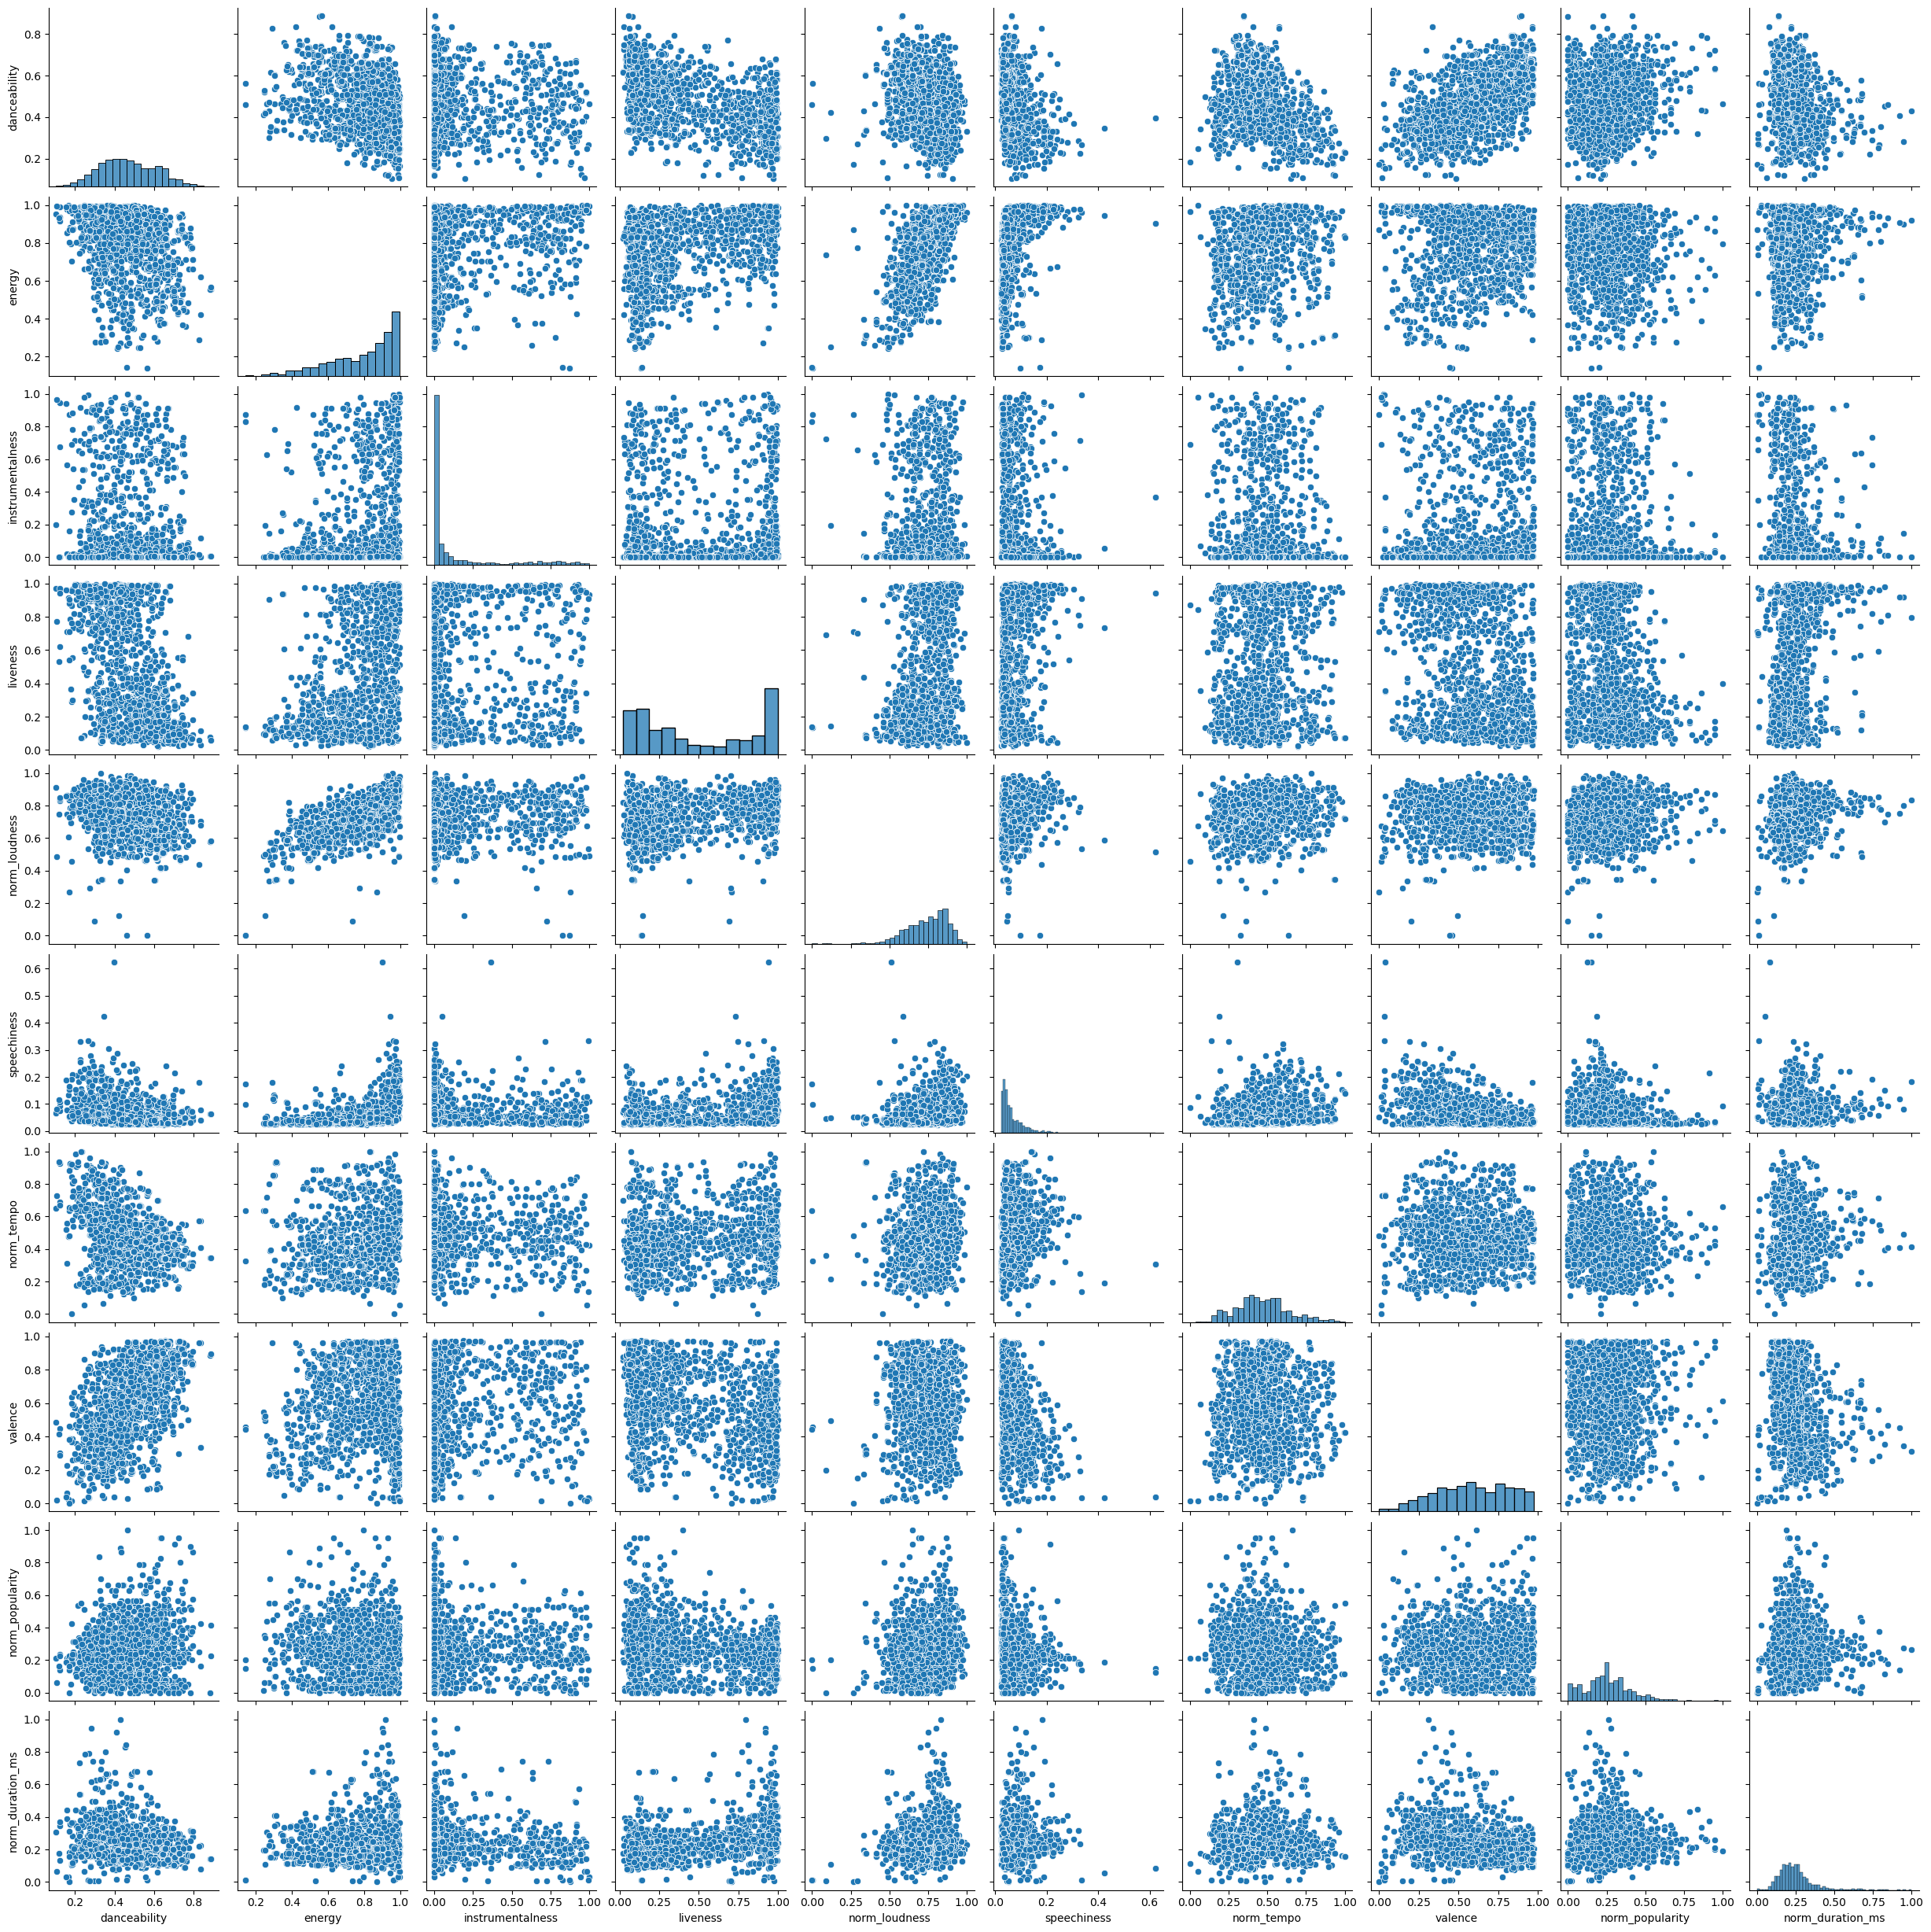

In [77]:
#paiplot
plt.figure(figsize=(20,20))
sns.pairplot(corr_matrix_df)
plt.show()

In [92]:
# identifying patterns from heatmap suggested correlations.
# columns to check normal distribution for :
# only danceability, energy, duration, tempo, loudness following normal distribution understood by above pairplot. while others are not following it, so i am going to folllow spearman correlation for non normal distribution features

#1. danceability vs valence

import scipy.stats as stats
Correlation_coff, p_value = stats.spearmanr(merged_df["danceability"], merged_df["valence"])
print(f"danceability vs valence,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")

#2. Energy Vs liveness
Correlation_coff, p_value = stats.spearmanr(merged_df["energy"], merged_df["liveness"])
print(f"Energy Vs liveness,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")
    
#3.speechness vs enerygy
Correlation_coff, p_value = stats.spearmanr(merged_df["speechiness"], merged_df["energy"])
print(f"speechness vs enerygy,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")

#4. speechness vs liveness
Correlation_coff, p_value = stats.spearmanr(merged_df["speechiness"], merged_df["liveness"])
print(f"speechness vs liveness,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")

#5. valence vs danceability
Correlation_coff, p_value = stats.spearmanr(merged_df["valence"], merged_df["danceability"])
print(f"valence vs danceability,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")

#6. loudness vs energy
#both are showing normal distribution, hence using pearsonr
Correlation_coff, p_value = stats.pearsonr(merged_df["loudness"], merged_df["energy"])
print(f"loudness vs energy,{Correlation_coff},{p_value}")
if 0 <= Correlation_coff <= 0.3 and p_value > 0.05:
    print("week correlation")
elif 0.3 < Correlation_coff < 0.5 and p_value < 0.05:
    print("moderate correlation")
else:
    print("Strong correlation")

#what is the correlation coefficient and p- value for effective correlation?
#We check if the absolute value of the correlation coefficient is greater than 0.5 and if the p-value is less than 0.05 to determine if the correlation is effective.


danceability vs valence,0.556965608318474,7.591672888090832e-132
Strong correlation
Energy Vs liveness,0.5300624101268263,2.512910353358011e-117
Strong correlation
speechness vs enerygy,0.6291263687108982,3.705847143101835e-178
Strong correlation
speechness vs liveness,0.4654680415791756,2.321090415649216e-87
moderate correlation
valence vs danceability,0.556965608318474,7.591672888090832e-132
Strong correlation
loudness vs energy,0.6980390870508659,1.6326393047446115e-235
Strong correlation


<function matplotlib.pyplot.show(close=None, block=None)>

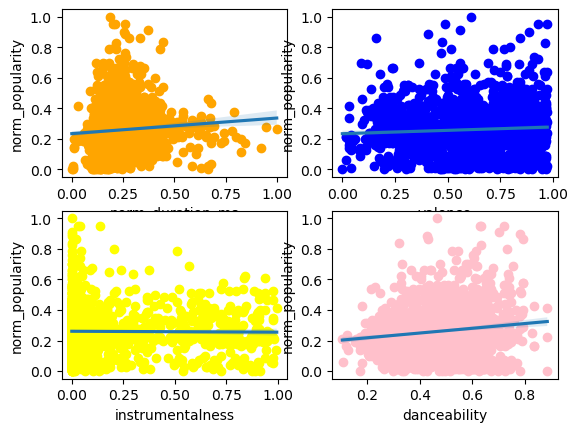

In [104]:
#Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
#-Duration, 2-valence, 1-loudness, 3-instrumentalness, 1-danceability

plt.subplot(2,2,1)
plt.scatter(merged_df["norm_duration_ms"], merged_df["norm_popularity"],color='orange')
sns.regplot(x = merged_df["norm_duration_ms"], y = merged_df["norm_popularity"], scatter=False)
plt.show

plt.subplot(2,2,2)
plt.scatter(merged_df["valence"], merged_df["norm_popularity"],color='Blue')
sns.regplot(x = merged_df["valence"], y = merged_df["norm_popularity"], scatter=False)
plt.show

plt.subplot(2,2,3)
plt.scatter(merged_df["instrumentalness"], merged_df["norm_popularity"], color='yellow')
sns.regplot(x = merged_df["instrumentalness"], y = merged_df["norm_popularity"], scatter=False)
plt.show

plt.subplot(2,2,4)
plt.scatter(merged_df["danceability"], merged_df["norm_popularity"], color ='pink')
sns.regplot(x = merged_df["danceability"], y = merged_df["norm_popularity"], scatter=False)
plt.show

      Unnamed: 0                                  name               album  \
0              0            Concert Intro Music - Live  Licked Live In NYC   
1              1            Street Fighting Man - Live  Licked Live In NYC   
2              2                    Start Me Up - Live  Licked Live In NYC   
3              3           If You Can't Rock Me - Live  Licked Live In NYC   
4              4                     Don’t Stop - Live  Licked Live In NYC   
...          ...                                   ...                 ...   
1550        1550                     Around And Around              12 x 5   
1551        1551                  Confessin' The Blues              12 x 5   
1552        1552                           Empty Heart              12 x 5   
1553        1553                    Time Is On My Side              12 x 5   
1554        1554  Good Times, Bad Times - Mono Version              12 x 5   

     release_date  track_number                      id  \
0   

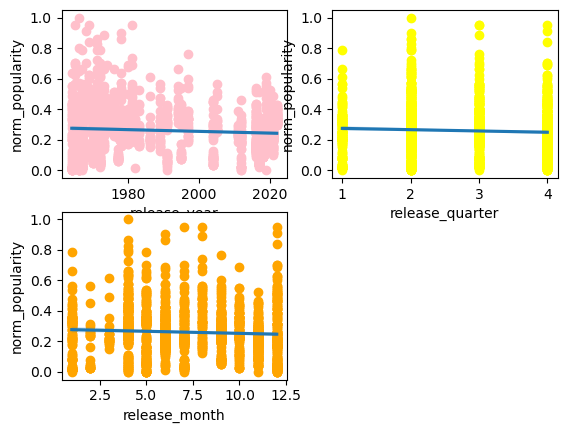

In [117]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
merged_df['release_year'] = merged_df['release_date'].dt.year
date_df = merged_df.groupby('release_year')
print(date_df.head(5))
plt.subplot(2,2,1)
plt.scatter(merged_df["release_year"], merged_df["norm_popularity"], color ='pink')
sns.regplot(x = merged_df["release_year"], y = merged_df["norm_popularity"], scatter=False)
plt.show
coefficent, pvalue = stats.spearmanr(merged_df["release_year"], merged_df["norm_popularity"])
print(f'release_year vs norm_popularity,{coefficent},{pvalue}')

merged_df['release_quarter'] = merged_df['release_date'].dt.quarter
date_df = merged_df.groupby('release_quarter')
plt.subplot(2,2,2)
plt.scatter(merged_df["release_quarter"], merged_df["norm_popularity"], color ='yellow')
sns.regplot(x = merged_df["release_quarter"], y = merged_df["norm_popularity"], scatter=False)
plt.show
coefficent, pvalue = stats.spearmanr(merged_df["release_quarter"], merged_df["norm_popularity"])
print(f'release_quarter vs norm_popularity,{coefficent},{pvalue}')

merged_df['release_month'] = merged_df['release_date'].dt.month
date_df = merged_df.groupby('release_month')
plt.subplot(2,2,3)
plt.scatter(merged_df["release_month"], merged_df["norm_popularity"], color ='orange')
sns.regplot(x = merged_df["release_month"], y = merged_df["norm_popularity"], scatter=False)
plt.show
coefficent, pvalue = stats.spearmanr(merged_df["release_month"], merged_df["norm_popularity"])
print(f'release_month vs norm_popularity,{coefficent},{pvalue}')

In [123]:
#Dimensionality Reduction:
#id,uri,unamed=0, release_date

final_df = merged_df.drop(['id','uri','Unnamed: 0','name','loudness','tempo','popularity','duration_ms','release_date', 'release_year','release_quarter','release_month'], axis=1)
final_df.head(2)

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,norm_loudness,norm_tempo,norm_popularity,norm_duration_ms
0,Licked Live In NYC,1,0.0824,0.463,0.993,0.996,0.932,0.1100,0.0302,0.491365,0.420994,0.4125,0.028766
1,Licked Live In NYC,2,0.4370,0.326,0.965,0.233,0.961,0.0759,0.3180,0.838035,0.500239,0.4250,0.241629


In [133]:
#Perform cluster analysis 

#converting album to numeric values using label_encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df['album'] = label.fit_transform(final_df['album'])
print(final_df)



      album  track_number  acousticness  danceability  energy  \
0        47             1        0.0824         0.463   0.993   
1        47             2        0.4370         0.326   0.965   
2        47             3        0.4160         0.386   0.969   
3        47             4        0.5670         0.369   0.985   
4        47             5        0.4000         0.303   0.969   
...     ...           ...           ...           ...     ...   
1605     76             8        0.1570         0.466   0.932   
1606     76             9        0.0576         0.509   0.706   
1607     76            10        0.3710         0.790   0.774   
1608     76            11        0.2170         0.700   0.546   
1609     76            12        0.3830         0.727   0.934   

      instrumentalness  liveness  speechiness  valence  norm_loudness  \
0             0.996000    0.9320       0.1100   0.0302       0.491365   
1             0.233000    0.9610       0.0759   0.3180       0.838035   


In [136]:
#normalizing the value of album since it is not in the range of 0 to 1
Scaler = MinMaxScaler()
normalize_column = final_df[['album']]
album_value = Scaler.fit_transform(normalize_column)
new_album_df= pd.DataFrame(album_value,columns=['album_normalized'])
final_df = final_df.drop(columns=['album'])
new_final_df=pd.concat([final_df,new_album_df],axis=1)
print(new_final_df)

      track_number  acousticness  danceability  energy  instrumentalness  \
0                1        0.0824         0.463   0.993          0.996000   
1                2        0.4370         0.326   0.965          0.233000   
2                3        0.4160         0.386   0.969          0.400000   
3                4        0.5670         0.369   0.985          0.000107   
4                5        0.4000         0.303   0.969          0.055900   
...            ...           ...           ...     ...               ...   
1605             8        0.1570         0.466   0.932          0.006170   
1606             9        0.0576         0.509   0.706          0.000002   
1607            10        0.3710         0.790   0.774          0.000000   
1608            11        0.2170         0.700   0.546          0.000070   
1609            12        0.3830         0.727   0.934          0.068500   

      liveness  speechiness  valence  norm_loudness  norm_tempo  \
0       0.9320      

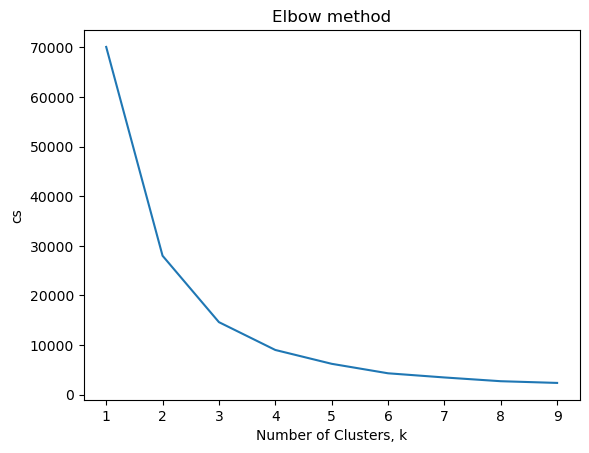

In [140]:
# #Identify the right number of clusters 
# Elbow Method to identify the right number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(new_final_df)
    cs.append(kmeans.inertia_)

plt.plot(range(1,10),cs)
plt.title('Elbow method')
plt.xlabel('Number of Clusters, k')
plt.ylabel('cs')
plt.show()


In [151]:
# #Use appropriate clustering algorithms 
# Kmeans

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(new_final_df)

#Quality Check by silhoutte score

KMeans(n_clusters=2, random_state=0)

In [152]:
# #Define each cluster based on the features
clusters = kmeans.labels_
print(clusters)

[0 0 0 ... 0 0 1]


In [153]:
from sklearn.metrics import silhouette_score
silhouette_score(new_final_df, clusters)


0.5967749208641566